# Feature Engineering



__Features__: Variables we use to help predict our target.


__Feature Engineering__:
- Combining variables that are highly correlated into one variable.
- Computationally expensive to calculate.
- Information that can lead to discrimination or unethical.
- Continuous variables with noise.
- Combining variables to reduce the effect of dimensionality. __Curse of dimensionality__

Goal in feature engineering:

I want to make it easy for the computer to see the patterns.

Algorithmic Feature Selection:


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

from prepare import add_scaled_columns

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
df.shape

(395, 33)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [7]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
obj_df = df.select_dtypes('O')
columns_to_drop = obj_df.columns.values

In [10]:
dummy_df = pd.get_dummies(obj_df, drop_first=True, dummy_na=False)

df = pd.concat([df, dummy_df], axis=1)

In [11]:
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [13]:
# Split the `Students` data into train_validate and test sets
train_validate, test = train_test_split(df, test_size=.2, random_state=123)

# Split the train_validate into validate and train sets
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [14]:
X_train = train.drop(columns='G3')
X_validate = validate.drop(columns='G3')
X_test = test.drop(columns='G3')

y_train = train.G3
y_validate = validate.G3
y_test = test.G3

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(copy=True).fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns.values,
                              index=X_train.index.values)

X_validate_scaled = pd.DataFrame(X_train_scaled,
                                 columns=X_validate.columns.values,
                                 index=X_validate.index.values)

X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns.values,
                             index=X_test.index.values)

In [18]:
X_train_scaled.shape

(221, 41)

In [19]:
X_train_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.75,0.25,0.25,0.00,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.75,0.50,1.00,0.50,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.75,0.75,0.25,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,1.00,0.25,0.75,0.00,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.75,1.00,0.25,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Create a Feature Object

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

In [21]:
f_selector = SelectKBest(f_regression, k=13)

In [22]:
f_selector = f_selector.fit(X_train_scaled, y_train)

In [23]:
# The transformation of SelectKBest 
X_train_reduced = f_selector.transform(X_train_scaled)

In [24]:
X_train_reduced.shape

(221, 13)

In [25]:
f_support = f_selector.get_support()
print(f_support)

[ True  True  True  True  True  True False False False False False False
 False  True  True False  True False False False False  True False False
 False False False False False False  True False  True False False False
 False False  True False False]


In [26]:
f_feature = X_train_scaled.iloc[:,f_support].columns.to_list()

## Recursive Feature Elimnation: RFE

Wrapper method

Recursively build model after model with fewer and fewer features.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Initialize linear regression model
lm = LinearRegression()

In [29]:
rfe = RFE(lm, 13)

X_rfe = rfe.fit_transform(X_train_scaled, y_train)

In [30]:
rfe_mask = rfe.support_

In [31]:
X_train_scaled_reduced = X_train_scaled.iloc[:, rfe_mask]

In [32]:
X_train_scaled_reduced.head()

,age,traveltime,failures,famrel,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,schoolsup_yes,famsup_yes,internet_yes
142,0.000000,0.000000,0.000000,0.75,0.035714,0.357143,0.578947,0.0,0.0,0.0,0.0,1.0,1.0
326,0.333333,0.000000,0.000000,0.75,0.053571,0.714286,0.789474,0.0,1.0,0.0,0.0,0.0,1.0
88,0.166667,0.333333,0.333333,0.75,0.214286,0.500000,0.526316,0.0,0.0,1.0,0.0,0.0,1.0
118,0.333333,0.666667,0.333333,1.00,0.357143,0.357143,0.368421,0.0,1.0,0.0,0.0,1.0,1.0
312,0.666667,0.000000,0.333333,0.75,0.053571,0.642857,0.578947,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
rfe_feature = X_train_scaled_reduced.columns.to_list()

In [34]:
rfe_feature == f_feature

False

#  Feature Engineering Exercises

Load the tips dataset.

In [35]:
df = data('tips')

In [36]:
df.size

1708

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [38]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

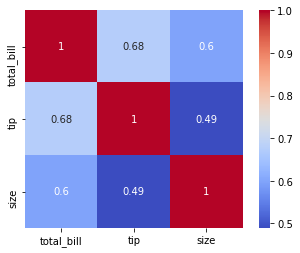

In [39]:
sns.heatmap(df.corr(),
           cmap='coolwarm',
           annot=True,
           square=True);

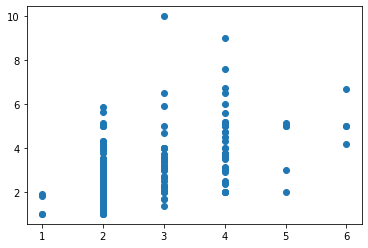

In [40]:
plt.scatter(df['size'], df.tip);

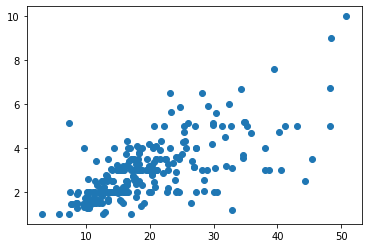

In [41]:
plt.scatter(df.total_bill, df.tip);

Create a column named `tip_percentage`. This should be the tip amount divided by the total bill.
Create a column named `price_per_person`. This should be the total bill divided by the party size.

In [122]:
df['tip_percentage'] = df.tip / df.total_bill
df['price_per_person'] = df.total_bill / df['size']

In [190]:
train_validate, test = train_test_split(df, test_size=.2, random_state=369)
train, validate = train_test_split(train_validate, test_size=.2, random_state=369)

In [191]:
X_train = train.drop(columns='tip')
y_train = train[['tip']]

In [192]:
y_train.shape

(156, 1)

In [193]:
columns_to_encode = X_train.select_dtypes(include=['O']).columns.to_list()

encoded_attributes = pd.get_dummies(X_train[columns_to_encode], drop_first=True)
X_train_encoded = pd.concat([X_train, encoded_attributes], axis=1)
X_train_encoded = X_train_encoded.drop(columns=columns_to_encode)

columns_to_scale = X_train.select_dtypes(include=['float', 'int']).columns.to_list()
scaler = MinMaxScaler().fit(X_train_encoded[columns_to_scale])
scaled_columns = [col + '_scaled' for col in columns_to_scale]

df_scaled = pd.DataFrame(scaler.transform(X_train[columns_to_scale]),
                         columns=scaled_columns,
                         index=X_train.index.values)

X_train_scaled_encoded = pd.concat([X_train_encoded, df_scaled], axis=1).drop(columns=columns_to_scale)

In [194]:
X_train_scaled_encoded.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_scaled,size_scaled,tip_percentage_scaled,price_per_person_scaled
147,0,0,0,0,1,1,0.277264,0.25,0.025276,0.199688
20,1,0,1,0,0,0,0.326193,0.25,0.161787,0.247988
10,1,0,0,1,0,0,0.183301,0.00,0.247901,0.284513
153,1,0,0,1,0,0,0.243671,0.25,0.156466,0.166526
164,1,0,0,1,0,0,0.159688,0.00,0.135170,0.249549


Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the `tip` amount? The `tip_percentage`?

> I believe `total_bill` and `size` will be the most important features.

Use all the other numeric features to predict `tip` amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [195]:
df_model_1_data = X_train_scaled_encoded
linreg = LinearRegression().fit(df_model_1_data, y_train)

f_selector = SelectKBest(f_regression, k=2)
rfe = RFE(linreg, 2)

X_reduced = f_selector.fit_transform(df_model_1_data, y_train)
X_rfe = rfe.fit_transform(df_model_1_data, y_train)

rfe_mask = rfe.support_
f_mask = f_selector.get_support()

f_features = df_model_1_data.iloc[:,f_mask].columns.to_list()
rfe_features = df_model_1_data.iloc[:,rfe_mask].columns.to_list()

print(f"Select K Best returned {len(f_features)} features")
print(f_features)
print("")
print(f"Recursive Feature Elimination Process returned {len(rfe_features)} features")
print(rfe_features)

Select K Best returned 2 features
['total_bill_scaled', 'size_scaled']

Recursive Feature Elimination Process returned 2 features
['total_bill_scaled', 'tip_percentage_scaled']


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
pd.DataFrame({'Attributes': df_model_1_data.columns.to_list(),
              'Rank': rfe.ranking_})

,Attributes,Rank
0,sex_Male,9
1,smoker_Yes,4
2,day_Sat,8
3,day_Sun,5
4,day_Thur,7
5,time_Lunch,6
6,total_bill_scaled,1
7,size_scaled,2
8,tip_percentage_scaled,1
9,price_per_person_scaled,3


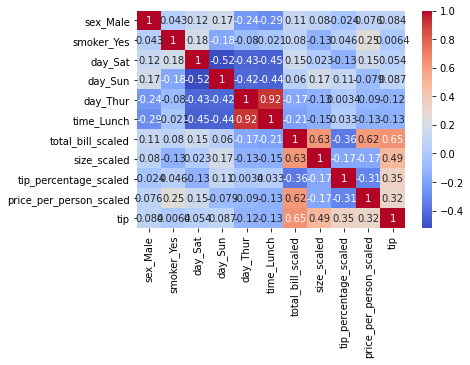

In [197]:
# mask = np.zeros_like(df_model_1_data).astype('int')
# np.triu_indices(mask)
sns.heatmap(pd.concat([df_model_1_data, y_train], axis=1).corr(),
            cmap='coolwarm',
            annot=True);

Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [198]:
X_train = train.drop(columns='tip_percentage')
y_train = train[['tip_percentage']]

In [199]:
columns_to_encode = X_train.select_dtypes(include=['O']).columns.to_list()

encoded_attributes = pd.get_dummies(X_train[columns_to_encode], drop_first=True)
X_train_encoded = pd.concat([X_train, encoded_attributes], axis=1)

X_train_encoded = X_train_encoded.drop(columns=columns_to_encode)

X_train_encoded.head()

columns_to_scale = X_train.select_dtypes(include=['float', 'int']).columns.to_list()

scaler = MinMaxScaler().fit(X_train_encoded[columns_to_scale])

scaled_columns = [col + '_scaled' for col in columns_to_scale]

df_scaled = pd.DataFrame(scaler.transform(X_train[columns_to_scale]),
                         columns=scaled_columns,
                         index=X_train.index.values)

X_train_scaled_encoded = pd.concat([X_train_encoded, df_scaled], axis=1).drop(columns=columns_to_scale)

In [200]:
df_model_2_data = X_train_scaled_encoded

linreg = LinearRegression().fit(df_model_2_data, y_train)

f_selector = SelectKBest(f_regression, k=2)
rfe = RFE(linreg, 2)

X_reduced = f_selector.fit_transform(df_model_2_data, y_train)
X_rfe = rfe.fit_transform(df_model_2_data, y_train)

f_mask = f_selector.get_support()
rfe_mask = rfe.support_

f_features = df_model_2_data.iloc[:,f_mask].columns.to_list()
rfe_features = df_model_2_data.iloc[:,rfe_mask].columns.to_list()

print(f"Select K Best returned {len(f_features)} features")
print(f_features)
print("")
print(f"Recursive Feature Elimination Process returned {len(rfe_features)} features")
print(rfe_features)

pd.DataFrame({'Attributes': df_model_2_data.columns.to_list(),
              'Rank': rfe.ranking_})



Select K Best returned 2 features
['total_bill_scaled', 'tip_scaled']

Recursive Feature Elimination Process returned 2 features
['total_bill_scaled', 'tip_scaled']


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attributes,Rank
0,sex_Male,8
1,smoker_Yes,4
2,day_Sat,9
3,day_Sun,5
4,day_Thur,6
5,time_Lunch,7
6,total_bill_scaled,1
7,tip_scaled,1
8,size_scaled,3
9,price_per_person_scaled,2


Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?



In [201]:
def select_kbest(predictors='', target='', n_top_features=3):
    '''
    
    '''
    f_selector = SelectKBest(f_regression, k=n_top_features)
    X_reduced = f_selector.fit_transform(df_model_2_data, y_train)
    
    f_mask = f_selector.get_support()
    f_features = df_model_2_data.iloc[:,f_mask].columns.values
    print(f"Select K Best returned {len(f_features)} features")
    print(f_features)

In [202]:
select_kbest(X_train_scaled_encoded.columns.to_list(), y_train, 3)

Select K Best returned 3 features
['total_bill_scaled' 'tip_scaled' 'price_per_person_scaled']


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
add_scaled_columns

<function __main__.add_scaled_columns(train, validate, test, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)), columns_to_scale=None, return_cols_to_scale=True)>

In [204]:
def add_encoded_columns(df, data_types='O', custom_columns=[], drop_encoders=True):
    '''
    
    '''
    if custom_columns != []:
        encoded_columns = pd.get_dummies(df[custom_columns], drop_first=True)
    else:
        columns_to_encode = df.select_dtypes(include=[data_types]).columns.to_list()
        encoded_columns = pd.get_dummies(df[columns_to_encode], drop_first=True)

    df = pd.concat([df, encoded_columns], axis=1)
    
    if drop_encoders:
        return df.drop(columns=columns_to_encode)
    else:
        return df, encoded_columns

In [205]:
train = add_encoded_columns(X_train)

In [206]:
train.head()

,total_bill,tip,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
147,18.64,1.36,3,6.213333,0,0,0,0,1,1
20,20.65,3.35,3,6.883333,1,0,1,0,0,0
10,14.78,3.23,2,7.390000,1,0,0,1,0,0
153,17.26,2.74,3,5.753333,1,0,0,1,0,0
164,13.81,2.00,2,6.905000,1,0,0,1,0,0


In [211]:
def add_scaled_columns(train, validate, test, scaler=MinMaxScaler(), columns_to_scale=None, return_cols_to_scale=True):
    
    if columns_to_scale == None:
        columns_to_scale = train.select_dtypes(include='float').columns.to_list()

    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    if return_cols_to_scale == False:
        train.drop(columns=columns_to_scale, inplace=True)
        validate.drop(columns=columns_to_scale, inplace=True)    
        test.drop(columns=columns_to_scale, inplace=True)
        return train, validate, test
    return train, validate, test, columns_to_scale

In [212]:
train, test, validate = add_scaled_columns(train, validate, test, return_cols_to_scale=False)

In [213]:
train.head()

,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_scaled_scaled,tip_scaled_scaled,price_per_person_scaled_scaled
147,3,0,0,0,0,1,1,0.277264,0.005208,0.199688
20,3,1,0,1,0,0,0,0.326193,0.264323,0.247988
10,2,1,0,0,1,0,0,0.183301,0.248698,0.284513
153,3,1,0,0,1,0,0,0.243671,0.184896,0.166526
164,2,1,0,0,1,0,0,0.159688,0.088542,0.249549


Feature engineering is performed with scaled data.
Feature selection is 

We perform feature selection on data that has been scaled. 

```python
from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, 5)
f_selector.fit(X_train_scaled, y_train) 
f_mask = f_selector.get_support()
X_train_scaled.iloc[:,f_mask]
```

We scale our data after we split it into train, validate, and test
wrangle = acquisition + prep

Break down functions into simple pieces. If you need to call multiple methods and functions, make it into a function!

If you have variables you want to drop, drop them before you create encoded columns.

When you scale dataframes, you'll need to add on the column names and index of the original dataframe.


### Recursive Feature Elimination
rfe object is only fit to the X_train_scaled, and the y_train data. The feature_selector object is not reassigned.

It accepts a LinerRegression() object and k, the number of top features to return.

When the model is `fit` to the data, it stores the X_train_scaled and y_train dataframe.